In [15]:
import torch
import torch.nn
from typing import List
from flytekit.remote import FlyteRemote
from flytekit.configuration import Config
from flytekit import task, workflow, reference_task, dynamic

from pictionary_app.dataset import QuickDrawDataset
from pictionary_app.main import model

In [51]:
client = FlyteRemote(config=Config.auto(config_file="./config/config-remote.yaml"))

In [53]:
batch_pred_wf = client.fetch_workflow(name="flytekit_demo.batch_predictions.wf", version="TODO", project="unionml", domain="development")
execution = client.execute(batch_pred_wf, inputs={"max_items_per_class": 20, "class_limit": 4}, wait=True)

FlyteEntityNotExistException: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.NOT_FOUND
	details = "missing entity of type WORKFLOW with identifier project:"unionml" domain:"development" name:"flytekit_demo.batch_predictions.wf" version:"TODO" "
	debug_error_string = "{"created":"@1651082549.542685649","description":"Error received from peer ipv4:3.19.82.116:443","file":"src/core/lib/surface/call.cc","file_line":903,"grpc_message":"missing entity of type WORKFLOW with identifier project:"unionml" domain:"development" name:"flytekit_demo.batch_predictions.wf" version:"TODO" ","grpc_status":5}"
>

In [49]:
# Inspect output of workflow execution and show the pairings of (image, predicted_label, label)

In [49]:
q = QuickDrawDataset(root="./tmp", max_items_per_class=20, class_limit=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Loading 20 examples for each class from the Quickdraw Dataset...


  0%|          | 0/10 [00:00<?, ?it/s]

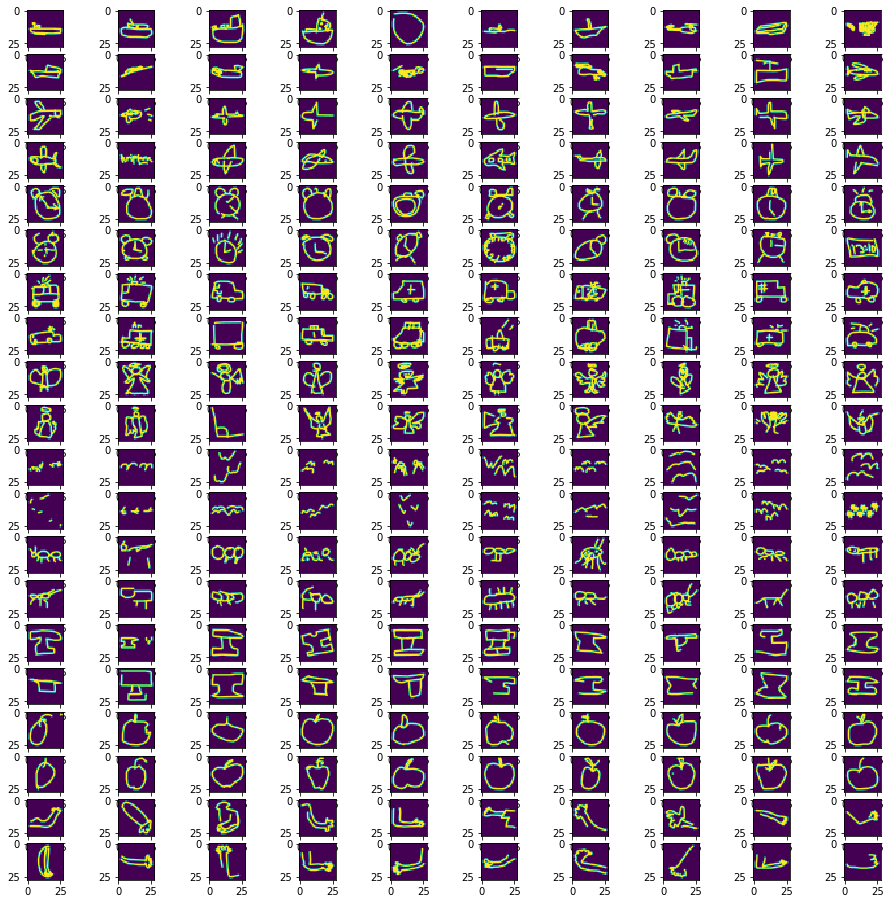

In [50]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(20, 10, figsize=(16,16))
for i, ax in enumerate(axes.flat):
    ax.imshow(q[i][0].permute(1, 2, 0), interpolation='nearest')
    
# plt.imshow(q[3][0].permute(1, 2, 0), interpolation='nearest')
# plt.show()

